<a href="https://colab.research.google.com/github/Kurthhenry/Statistics-DataScience/blob/main/Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is showing the data cleaning and EDA of group XY named **Platypus**.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Preliminary Specifications
We import the packages that are needed for the data analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
#Set Directory
directory = "/content/drive/My Drive/Platypus"

Now we must specify variables that delimit our sample of countries and the years we are looking at.

In [12]:
#specification of year range
year_range = list(range(1990,2021))
year_range_2 = list(range(2000,2021))
short_range = list(range(1985,1997))

#Specification of Countries
lis = list(df["Country"].unique())
lis.remove("Japan")
lis.remove("United States")
lis.remove("Canada")
lis.remove("Korea")
lis.remove("Australia")
lis.remove("South Africa")
lis.remove("China (People's Republic of)")
lis.remove("Indonesia")
lis.remove("Brazil")
lis.remove("India")
countrylist = lis


#specification of 3l-CC
lis = list(df["COU"].unique())
lis.remove("JPN")
lis.remove("USA")
lis.remove("CAN")
lis.remove("KOR")
lis.remove("AUS")
lis.remove("ZAF")
lis.remove("CHN")
lis.remove("IDN")
lis.remove("BRA")
lis.remove("IND")
cclist = lis

countrymap = {"Greece":"GRC",
"Portugal":"PRT",
"France":"FRA",
"Belgium":"BEL",
"Switzerland":"CHE",
"Czech Republic":"CZE",
"Denmark":"DNK",
"Italy":"ITA",
"Spain":"ESP",
"Sweden":"SWE",
"United Kingdom":"GBR",
"Poland":"POL",
"Netherlands":"NLD",
"Ireland":"IRL",
"Finland":"FIN",
"Hungary":"HUN",
"Germany":"DEU",
"Norway":"NOR",
"Slovak Republic":"SVK",
"Austria":"AUT",
"Turkey":"TUR",
"Slovenia":"SVN",
"Russia":"RUS"}

"""
#west=0, neutral=1, east=2
eastwestmap = {"Greece":0,
"Portugal":0,
"France":0,
"Belgium":0,
"Switzerland":1,
"Czech Republic":2,
"Denmark":0,
"Italy":0,
"Spain":0,
"Sweden":1,
"United Kingdom":0,
"Poland":2,
"Netherlands":0,
"Ireland":1,
"Finland":1,
"Hungary":2,
"Germany":0,
"Norway":0,
"Slovak Republic":2,
"Austria":1,
"Turkey":0,
"Slovenia":2,
"Russia":2}"""

#west=0, east=1
eastwestmap = {"Greece":0,
"Portugal":0,
"France":0,
"Belgium":0,
"Switzerland":0,
"Czech Republic":1,
"Denmark":0,
"Italy":0,
"Spain":0,
"Sweden":0,
"United Kingdom":0,
"Poland":1,
"Netherlands":0,
"Ireland":0,
"Finland":0,
"Hungary":1,
"Germany":0,
"Norway":0,
"Slovak Republic":1,
"Austria":0,
"Turkey":0,
"Slovenia":1,
"Russia":1}

west = ["GRC", "PRT", "FRA", "BEL", "DEN", "ITA", "ESP", "GBR", "NLD", "DEU", "NOR", "TUR"]
east = ["CZE", "POL", "HUN", "SVK", "SVN", "RUS"]

##Data Cleaning and Preparation
Now that we have the initial specifications we need for the analysis, we can start with the import of the actual data and start cleaning it. We have data from different sources that are structured differently. We start with the data on countries' Environmental Policy Stringency Indices.

In [14]:
#Dataframe: Environmental Policy Stringency
path = "/DATA/OECD/OECD_EPS.csv"
dfeps = pd.read_csv(directory + path, index_col=False)
dfeps['Country'] = dfeps['Country'].replace('Türkiye', 'Turkey')
dfeps = dfeps.loc[dfeps['Country'].isin(countrylist)]
dfeps = dfeps.loc[dfeps['VAR'] == "EPS"]
dfeps = dfeps.drop(["Country","VAR","Variable", "YEA", "Unit Code", "Unit", "PowerCode Code", "PowerCode", "Reference Period Code", "Reference Period", "Flag Codes", "Flags"], axis=1)
dfeps.rename(columns={'COU': 'CC'}, inplace=True)
dfeps.rename(columns={'Value': 'EPS'}, inplace=True)
dfeps = dfeps.loc[dfeps['Year'].isin(year_range_2)]

#test sample size:
obs_eps = list(dfeps["CC"].unique())

#Export
path = "/OUT_df/EPS_cleaned.csv"
dfeps.to_csv(directory + path, index=False)

In [15]:
#women in parliament dataframe (UIP)
path = "/DATA/IPU/WIP_IPU.xlsx"
dfww = pd.read_excel(directory + path)
dfww = dfww.drop(["Region", "Election / Renewal", "Month", "Chamber Total Seats", "Total women"], axis=1)
dfww['Country'] = dfww['Country'].replace('Slovakia', 'Slovak Republic')
dfww = dfww.loc[dfww['Country'].isin(countrylist)]
#obs_WIP = list(dfww["Country"].unique())
dfww = dfww[dfww['Chamber Type'] != 'Upper']
dfww = dfww.drop(["Chamber Type", "NOTES"], axis=1)
dfww.rename(columns={'% Of Women in Chamber': 'WIP'}, inplace=True)
dfww = dfww.loc[dfww['Year'].isin(short_range)]

all_years_countries = pd.DataFrame([(year, country) for year in range(1985, 1997) for country in countrylist], columns=['Year', 'Country'])
merged_df = all_years_countries.merge(dfww, on=['Year', 'Country'], how='left')
merged_df['WIP'] = merged_df.groupby('Country')['WIP'].fillna(method='ffill')
dfww = merged_df
dfww = dfww.loc[dfww['Year'].isin(year_range)]
dfww['Country'] = dfww['Country'].map(countrymap)
neworder = ['Country', 'Year', 'WIP']
dfww = dfww[neworder]
dfww.rename(columns={'Country': 'CC'}, inplace=True)
dfww['WIP'] = dfww['WIP'] * 100


#second WIP dataframe
path = "/DATA/OurWorldInData/womeninparliament.csv"
dfw = pd.read_csv(directory + path)
#dfw["Code"].unique()
dfw.rename(columns={'Code': 'CC'}, inplace=True)
dfw.rename(columns={'Proportion of seats held by women in national parliaments (%)': 'WIP'}, inplace=True)
dfw = dfw.drop("Entity", axis=1)
dfw = dfw.loc[dfw['CC'].isin(cclist)]

#Merging the two dataframes
dfw_merged = pd.concat([dfw, dfww])
dfw_merged = dfw_merged.sort_values(by=['CC',"Year"])
dfw_merged = dfw_merged.reset_index(drop=True)
dfw_merged["WIP"] = dfw_merged["WIP"].astype(float)
dfw_merged = dfw_merged.loc[dfw_merged['Year'].isin(year_range_2)]
#obs_WIP = list(dfw_merged["CC"].unique())

#Export
path = "/OUT_df/Share_WIP_Cleaned.csv"
dfw_merged.to_csv(directory + path, index=False)

<ipython-input-15-cb06058804a1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfww['Country'] = dfww['Country'].map(countrymap)


In [16]:
# dataframe for east - west blocks
dfew = pd.DataFrame(list(eastwestmap.items()), columns=['Country', 'Block'])
for year in range(1990, 2022):
    dfew[str(year)] = dfew['Block']

dfew.drop('Block', axis=1, inplace=True)
dfew = pd.melt(dfew, id_vars=['Country'], var_name='Year', value_name='Block')
dfew['Country'] = dfew['Country'].map(countrymap)
dfew.rename(columns={'Country': 'CC'}, inplace=True)
dfew = dfew.sort_values(by=['CC',"Year"])
dfew = dfew.reset_index(drop=True)
dfew["Year"] = dfew["Year"].astype(int)
dfew = dfew.loc[dfew['Year'].isin(year_range_2)]
#obs_ew = list(dfew["CC"].unique())

#Export
path = "/OUT_df/East_West_cleaned.csv"
dfew.to_csv(directory + path, index=False)

In [17]:
# dataframe for GDP per capita
path = "/DATA/OECD/GDP_pc.csv"
dfg = pd.read_csv(directory + path)
dfg = dfg.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)
dfg.rename(columns={'LOCATION': 'CC', "TIME":"Year", "Value":"GDPpc"}, inplace=True)
dfg = dfg.loc[dfg['CC'].isin(cclist)]
dfg = dfg.loc[dfg['Year'].isin(year_range_2)]

#Export
path = "/OUT_df/GDPpc_cleaned.csv"
dfg.to_csv(directory + path, index=False)

In [19]:
# dataframe for Education
path = "/DATA/OECD/Education.csv"
dfe = pd.read_csv(directory + path)
dfe = dfe.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)
dfe.rename(columns={'LOCATION': 'CC', "TIME":"Year", "Value":"Education"}, inplace=True)
dfe = dfe.loc[dfe['CC'].isin(cclist)]

dfe_pivot = dfe.pivot(index='Year', columns='CC', values="Education").reset_index()
dfe_pivot = dfe_pivot.fillna(method='bfill')
dfe_pivot = dfe_pivot.fillna(method='ffill')
dfe = pd.melt(dfe_pivot, id_vars=['Year'], var_name='CC', value_name='Education')
dfe = dfe.loc[dfe['Year'].isin(year_range_2)]
neworder = ['CC', 'Year', "Education"]
dfe = dfe[neworder]

#Export
path = "/OUT_df/Education_cleaned.csv"
dfe.to_csv(directory + path, index=False)

In this last step we now merge the individual data frames to one large data frame that contains all the values we need for the analysis.

In [20]:
#merging the dataframes
dfew['Year'] = dfew['Year'].astype(int)
merged = dfeps.merge(dfew, on=['CC', 'Year'])
merged = merged.merge(dfw_merged, on=["CC", "Year"], how= "outer")
merged = merged.merge(dfg, on=["CC", "Year"], how= "outer")
merged = merged.merge(dfe, on=["CC", "Year"], how= "outer")
merged = merged[merged['Year'] != 2021]
merged = merged[merged['Year'] != 2022]
merged = merged.sort_values(by=['CC',"Year"])
merged["WIP"] = merged["WIP"].fillna(method='bfill')
neworder = ['CC', 'Year', 'EPS', "WIP", "Block", "GDPpc", "Education"]
merged = merged[neworder]

#merged["Education"] = merged["Education"].fillna(method='bfill')

#export
path = "/OUT_df/final_df_cleaned.csv"
merged.to_csv(directory + path, index = False)

##Summary Statistics
We first look at the general summary statistics of our variables. Those are the number of observations, the mean, the standard deviation, minimum and maximum values, and the quantiles in between.

In [22]:
#average share of women in parliament
means_WIP = dfw_merged.groupby(dfw_merged["CC"])['WIP'].mean().reset_index()
means_WIP.rename(columns={'WIP': 'Average WIP'}, inplace=True)
means_WIP = means_WIP.sort_values(by='Average WIP', ascending = False)

#average eps score
means_eps = dfeps.groupby(dfeps["CC"])['EPS'].mean().reset_index()
means_eps.rename(columns={'EPS': 'Average EPS'}, inplace=True)
means_eps = means_eps.sort_values(by='Average EPS', ascending = False)

summary_stats = merged.describe()
new_labels = {
    'count': 'Number of Observations',
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum Value',
    '25%': '1st Quartile',
    '50%': 'Median',
    '75%': '3rd Quartile',
    'max': 'Maximum Value'
}
summary_stats = summary_stats.rename(index=new_labels)
summary_stats = summary_stats.reset_index()
summary_stats = summary_stats.drop("Year", axis=1)
summary_stats.rename(columns={'index': 'Statistic'}, inplace=True)
summary_stats = summary_stats.round(2)
summary_stats = summary_stats[['Statistic', 'EPS', 'WIP', "Block", "GDPpc", "Education"]]
print(summary_stats)

#table export to LaTeX format -> tbc in Overleaf
latex_ss = summary_stats.to_latex(index=False)
latex_document = r"""
\documentclass{article}
\begin{document}
\begin{table}
\centering
""" + latex_ss + r"""
\caption{Sample table}
\end{table}
\end{document}
"""
path = "/OUT_tables/table.tex"
with open(directory + path, 'w') as f:
    f.write(latex_document)

                Statistic     EPS     WIP   Block     GDPpc  Education
0  Number of Observations  483.00  483.00  483.00    483.00     483.00
1                    Mean    2.66   26.44    0.26  35534.32      35.39
2      Standard Deviation    0.88   11.31    0.44  13989.95      11.37
3           Minimum Value    0.53    4.18    0.00   7323.44       8.88
4            1st Quartile    2.21   16.67    0.00  26728.10      27.90
5                  Median    2.78   27.39    0.00  33784.45      37.59
6            3rd Quartile    3.19   36.62    1.00  43393.60      43.04
7           Maximum Value    4.89   47.28    1.00  94646.64      62.66


<ipython-input-22-5df4edfa6121>:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_ss = summary_stats.to_latex(index=False)


##Visualisations of Exploratory Data Analysis
Let us start by visualising the relations between the variables in a correlation table.

<ipython-input-31-5add24fc800a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged.corr()


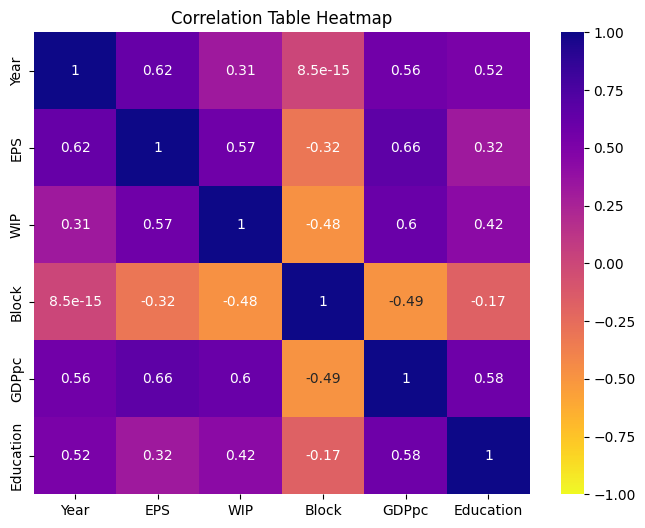

In [31]:
corr = merged.corr()
#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='plasma_r', vmin=-1, vmax=1)
plt.title('Correlation Table Heatmap')
path = "/OUT_plots/Correlation_Heatmap.pdf"
plt.savefig(directory + path)
plt.show()

Let us now look at the distribution of our sample according to the heterogeneity variable, i.e. whether a country was in the eastern or western block during the cold war.

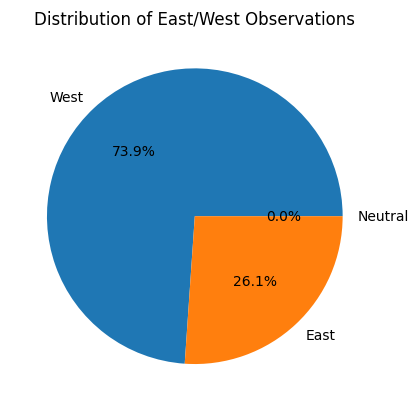

In [25]:
#Pie plot for block distirbution
counts = [sum(merged["Block"] == 0), sum(merged["Block"] == 1), sum(merged["Block"] == 2)]
plt.pie(counts, labels=['West', 'East', "Neutral"], autopct='%1.1f%%')
plt.title("Distribution of East/West Observations")
path = "/OUT_plots/Pie_Block.pdf"
plt.savefig(directory + path)
plt.show()

Next we will use scatter plots to identify possible correlations between the dependent and our independent variables. We thereby always differentiate between block membership to identify whether this difference in systems could lead to already visible differences in values.

Also, scatterplots can be very useful to identify outliers in the sample! Such outliers are hard to identify without visualizing the data, i.e. by only looking at the tabular representation of values.

We start with a scatterplot visualising the relationship between the EPS score and the share of women in parliament.

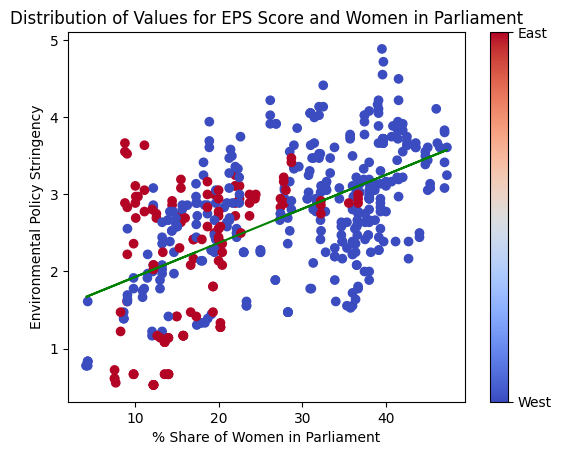

In [28]:
#EPS & WiP - Block
slope, intercept = np.polyfit(merged['WIP'], merged['EPS'], 1)
plt.scatter(merged['WIP'], merged['EPS'], c=merged['Block'], cmap='coolwarm', marker='o')
x = np.array(merged['WIP'])
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='green')
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['West', 'East'])
plt.xlabel('% Share of Women in Parliament')
plt.ylabel('Environmental Policy Stringency')
plt.title("Distribution of Values for EPS Score and Women in Parliament")
path = "/OUT_plots/Scatter_EPS_WIP.pdf"
plt.savefig(directory + path)
plt.show()

We do the same for the relationship between the EPS score and GDP per capita.

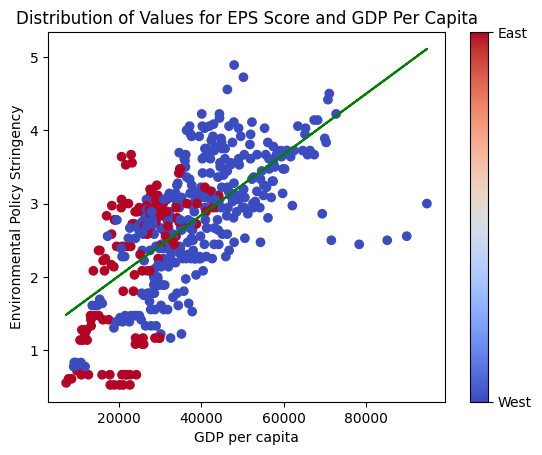

In [29]:
#EPS & GDPpc - Block
slope, intercept = np.polyfit(merged['GDPpc'], merged['EPS'], 1)
plt.scatter(merged['GDPpc'], merged['EPS'], c=merged['Block'], cmap='coolwarm', marker='o')
x = np.array(merged['GDPpc'])
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='green')
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['West', 'East'])
plt.xlabel('GDP per capita')
plt.ylabel('Environmental Policy Stringency')
plt.title("Distribution of Values for EPS Score and GDP Per Capita")
path = "/OUT_plots/Scatter_EPS_GDPpc.pdf"
plt.savefig(directory + path)
plt.show()

We might consider Log-transforming the data for GDP per capita since it is definitely right skewed. However, the rule of thumb is to apply Log-transformation only if the skewness is beyond the range [-3,3].

In [32]:
skewness = merged['GDPpc'].skew()
print("Skewness: ", skewness)


Skewness:  0.7215980134073005


We also create a correlation table for education, our second control variable.

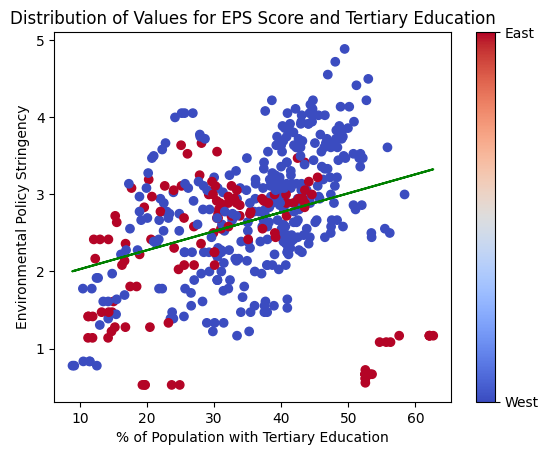

In [33]:
#EPS & Education - Block
slope, intercept = np.polyfit(merged['Education'], merged['EPS'], 1)
plt.scatter(merged['Education'], merged['EPS'], c=merged['Block'], cmap='coolwarm', marker='o')
x = np.array(merged['Education'])
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='green')
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['West', 'East'])
plt.xlabel('% of Population with Tertiary Education')
plt.ylabel('Environmental Policy Stringency')
plt.title("Distribution of Values for EPS Score and Tertiary Education")
path = "/OUT_plots/Scatter_EPS_Education.pdf"
plt.savefig(directory + path)
plt.show()

There are clearly some outliers to be seen. It is important to find out which country exhibits those values. If it is the country of our study, this could be problematic. If these rather linearly low education values are to be attributed to one single country, it would mean that for that country, education is not correlated to the EPS score and with that no endogenous variable.

To figure out what country could be interesting to use as a treatment or control, we now look at the behaviour of our main variables, EPS score and share of women in parliaments, over time for each object of the sample population.

We start by looking at the evolution of countries' EPS scores.

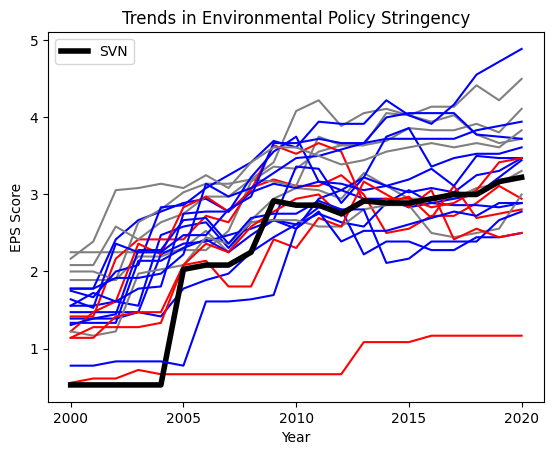

In [34]:
#development of EPS
dfe_pivot = dfeps.pivot(index='Year', columns='CC', values="EPS")
#avg_dfe = oecd_df.groupby('Year')['EPS'].mean().reset_index()
#dfe_pivot = dfe_pivot.merge(avg_dfe, on= "Year")
#dfe_pivot = dfe_pivot.set_index('Year')
dfe_pivot.rename(columns={'EPS': 'Average'}, inplace=True)
highlight_country = 'SVN'
highlight_color = 'black'
ax = plt.gca()  # Get current axis
for country in dfe_pivot.columns:
    if country == highlight_country:
        dfe_pivot[country].plot(ax=ax, color=highlight_color, label=country, linewidth=4)
    elif country in east:
        dfe_pivot[country].plot(ax=ax, color='red', label='_nolegend_')
    elif country in west:
        dfe_pivot[country].plot(ax=ax, color='blue', label='_nolegend_')
    else:
        dfe_pivot[country].plot(ax=ax, color='grey', label='_nolegend_')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.title("Trends in Environmental Policy Stringency")
plt.ylabel('EPS Score')
plt.xlabel('Year')
#plt.grid(True)
plt.legend()
path = "/OUT_plots/Line_EPS_SVN.pdf"
plt.savefig(directory + path)
plt.show()

The same is done for our main independent variable, the share of women in continental European OECD parliaments.

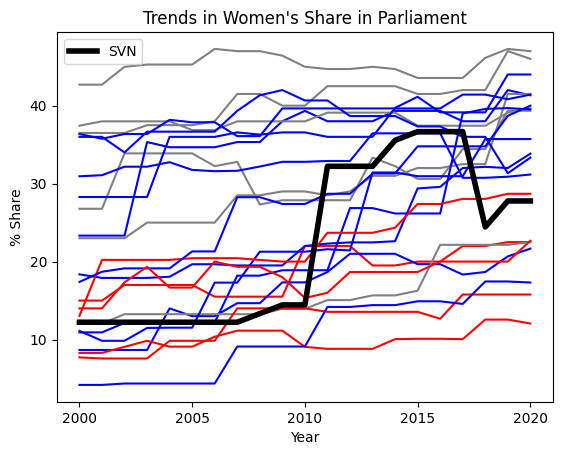

In [35]:
#development of WIP
dfw_pivot = dfw_merged.pivot(index='Year', columns='CC', values="WIP")
dfw_pivot = dfw_pivot.fillna(method='bfill')
#avg_dfw = dfw_merged.groupby('Year')['WIP'].mean().reset_index()
#dfw_pivot = dfw_pivot.merge(avg_dfw, on= "Year")
#dfw_pivot = dfw_pivot[dfw_pivot['Year'] != 2021]
#dfw_pivot = dfw_pivot.set_index('Year')
dfw_pivot.rename(columns={'WIP': 'Average'}, inplace=True)
highlight_country = 'SVN'
highlight_color = "black"
ax = plt.gca()  # Get current axis
for country in dfw_pivot.columns:
    if country == highlight_country:
        dfw_pivot[country].plot(ax=ax, color=highlight_color, label=country, linewidth=4)
    elif country in east:
        dfw_pivot[country].plot(ax=ax, color='red', label='_nolegend_')
    elif country in west:
        dfw_pivot[country].plot(ax=ax, color='blue', label='_nolegend_')
    else:
        dfw_pivot[country].plot(ax=ax, color='grey', label='_nolegend_')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.title("Trends in Women's Share in Parliament")
plt.ylabel('% Share')
plt.xlabel('Year')
#plt.grid(True)
plt.legend()
path = "/OUT_plots/Line_WIP_wHighlight.pdf"
plt.savefig(directory + path)
plt.show()

As we can see above, there is a clear jump in the trajectory of Slovenia in 2010. This is when the government introduced gender quotas for its 2010 elections. We will use this event to study a causal realtionship between the share of women in parliament and a country's EPS score.